In [17]:
# Importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam


# Importing the MNIST data sample

train_sample = pd.read_csv("mnist_train.csv")
test_sample = pd.read_csv("mnist_test.csv")


# Splitiing into features (x) and labels (y)

x_train = train_sample.iloc[:, 1:].values
y_train = train_sample.iloc[:, 0].values

x_test = test_sample.iloc[:, 1:].values
y_test = test_sample.iloc[:, 0].values

# Normalization of features

x_train_nom = (x_train/255.0).astype(np.float32)
x_test_nom = (x_test/255.0).astype(np.float32)

y_train_nom = y_train.copy()
y_test_nom = y_test.copy()

In [18]:
# Splitting into training and validation sets
x_train_nom, x_val, y_train_nom, y_val = train_test_split(x_train_nom, y_train_nom, test_size=0.2, random_state=42)

In [19]:
# building a neural network
def neural_network_optimizers(optimizer):
    # defining the model structure (layers & neurons)
    model = Sequential([
        Dense(128, activation="relu", input_shape=(784,)), # Hiden layer 1 with 128 neurons, relu activation and 784 image shape
        Dense(64, activation="relu"), # Hiden layer 2 with 64 neurons, relu activation
        Dense(10, activation="softmax") #Output layer 1 with 10 neurons or classes and softmax activation
    ])

    # compiling the model
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model
    
# Defining the different optimizers
optimizers = {
    "Mini-Batch_GD" : SGD(learning_rate=0.01),
    "Momentum" : SGD(learning_rate=0.01, momentum=0.9),
    "RMSprop" : RMSprop(learning_rate=0.001),
    "Adam" : Adam(learning_rate=0.001)
}

# Results stored here
results = {}

# Training and Evaluating the model on all the optimizers
for opt_name, opt in optimizers.items():
    print(f"\nTraining {opt_name} optimizer ...")

    # Building and Training the model
    model = neural_network_optimizers(opt)
    training = model.fit(
        x_train_nom, 
        y_train_nom,
        epochs=10,
        validation_data=(x_val, y_val),
        batch_size=64,
        verbose=1
    )

    # Evaluation on test samples
    test_loss, test_acc = model.evaluate(x_test_nom, y_test_nom)
    print(f"{opt_name} - Test Accuracy: {test_acc:.4f} | {test_loss:.4f}")

    # Append the results to the dictionary "results"
    results[opt_name] = {
        "accuracy" : test_acc,
        "loss" : test_loss,
        "training" : training
    }


Training Mini-Batch_GD optimizer ...
Epoch 1/10


C:\Users\digital world\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5839 - loss: 1.5021 - val_accuracy: 0.8731 - val_loss: 0.4738
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8816 - loss: 0.4294 - val_accuracy: 0.9024 - val_loss: 0.3498
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9044 - loss: 0.3390 - val_accuracy: 0.9144 - val_loss: 0.3052
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9155 - loss: 0.3008 - val_accuracy: 0.9198 - val_loss: 0.2797
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9203 - loss: 0.2784 - val_accuracy: 0.9273 - val_loss: 0.2575
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9282 - loss: 0.2503 - val_accuracy: 0.9312 - val_loss: 0.2416
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9340 - loss: 0.2305 - val_accuracy: 0.9342 - val_loss: 0.2304
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9361 - loss: 0.2225 - val_accuracy: 0.9397 - val_

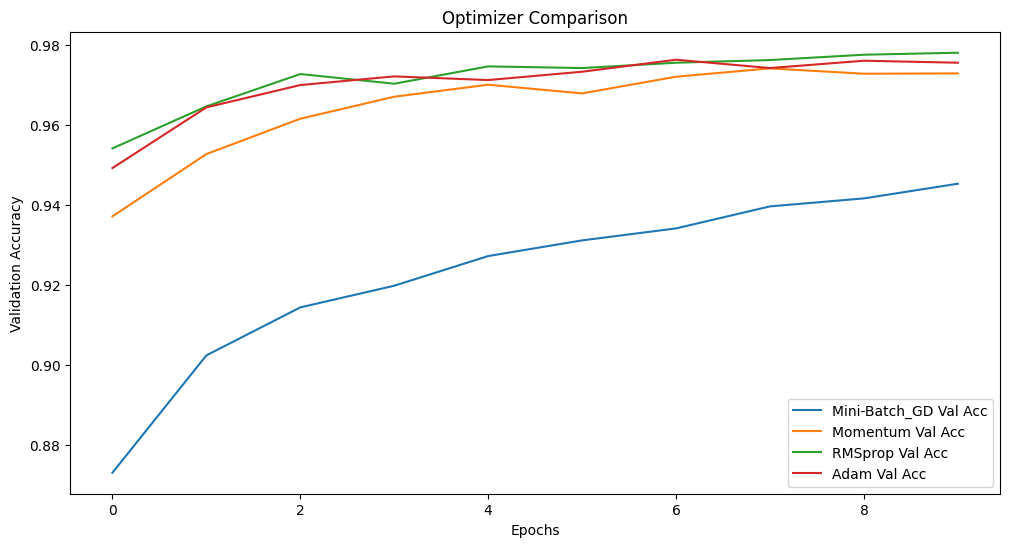

In [20]:
# Plot Training Performance
plt.figure(figsize=(12, 6))
for opt_name, result in results.items():
    plt.plot(result["training"].history["val_accuracy"], label=f"{opt_name} Val Acc")

plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Optimizer Comparison")
plt.legend()
plt.show()